# Предварительный анализ данных

In [1]:
import pandas as pd

df = pd.read_csv('data/distance_graph_dataset_2.csv')

In [2]:
df.sample(10)

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
2273,25,1,13,13,3,24,3
6730,100,1,48,34,4,47,4
5940,150,1,76,68,5,118,5
6140,50,0,19,19,5,34,5
3190,350,0,127,119,6,313,7
6891,350,1,154,120,5,300,6
4323,500,0,205,165,6,405,7
4901,300,0,117,90,5,235,6
9679,500,1,236,203,5,439,7
4280,400,1,187,177,4,373,5


In [3]:
df.describe()

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000
mean,249.610000,0.498500,101.474700,87.49400,4.643800,204.13800,5.774000
std,154.237566,0.500023,61.936357,54.54641,0.938728,138.95889,1.047489
min,25.000000,0.000000,8.000000,7.00000,1.000000,1.00000,2.000000
25%,100.000000,0.000000,45.000000,38.00000,4.000000,77.00000,5.000000
50%,250.000000,0.000000,100.000000,85.00000,5.000000,195.00000,6.000000
75%,400.000000,1.000000,152.000000,132.00000,5.000000,321.00000,6.000000
max,500.000000,1.000000,244.000000,228.00000,8.000000,500.00000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   n                         10000 non-null  int64
 1   distribution              10000 non-null  int64
 2   chromatic_number          10000 non-null  int64
 3   clique_number             10000 non-null  int64
 4   max_independent_set_size  10000 non-null  int64
 5   domination_number         10000 non-null  int64
 6   min_clique_cover_size     10000 non-null  int64
dtypes: int64(7)
memory usage: 547.0 KB


**Небольшой анализ целевой переменной**

In [5]:
counts = df['distribution'].value_counts()
props = df['distribution'].value_counts(normalize=True)
print(counts, props)

distribution
0    5015
1    4985
Name: count, dtype: int64 distribution
0    0.5015
1    0.4985
Name: proportion, dtype: float64


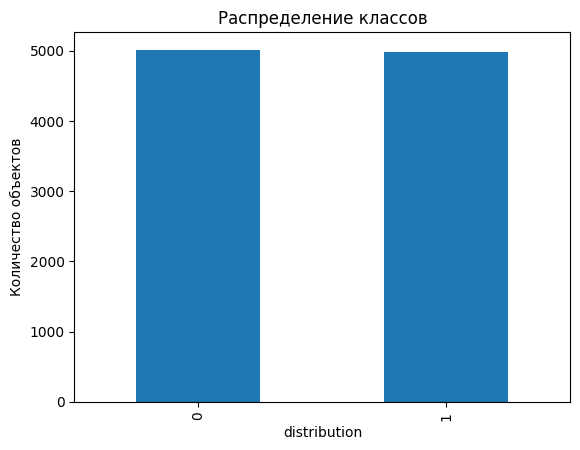

In [6]:
import matplotlib.pyplot as plt

counts.plot(kind='bar')
plt.title('Распределение классов')
plt.xlabel('distribution')
plt.ylabel('Количество объектов')
plt.show()

Оба класса распределны равномерно, их доли в датасете примерно равны.

**Построим pair plot** для визуализации:

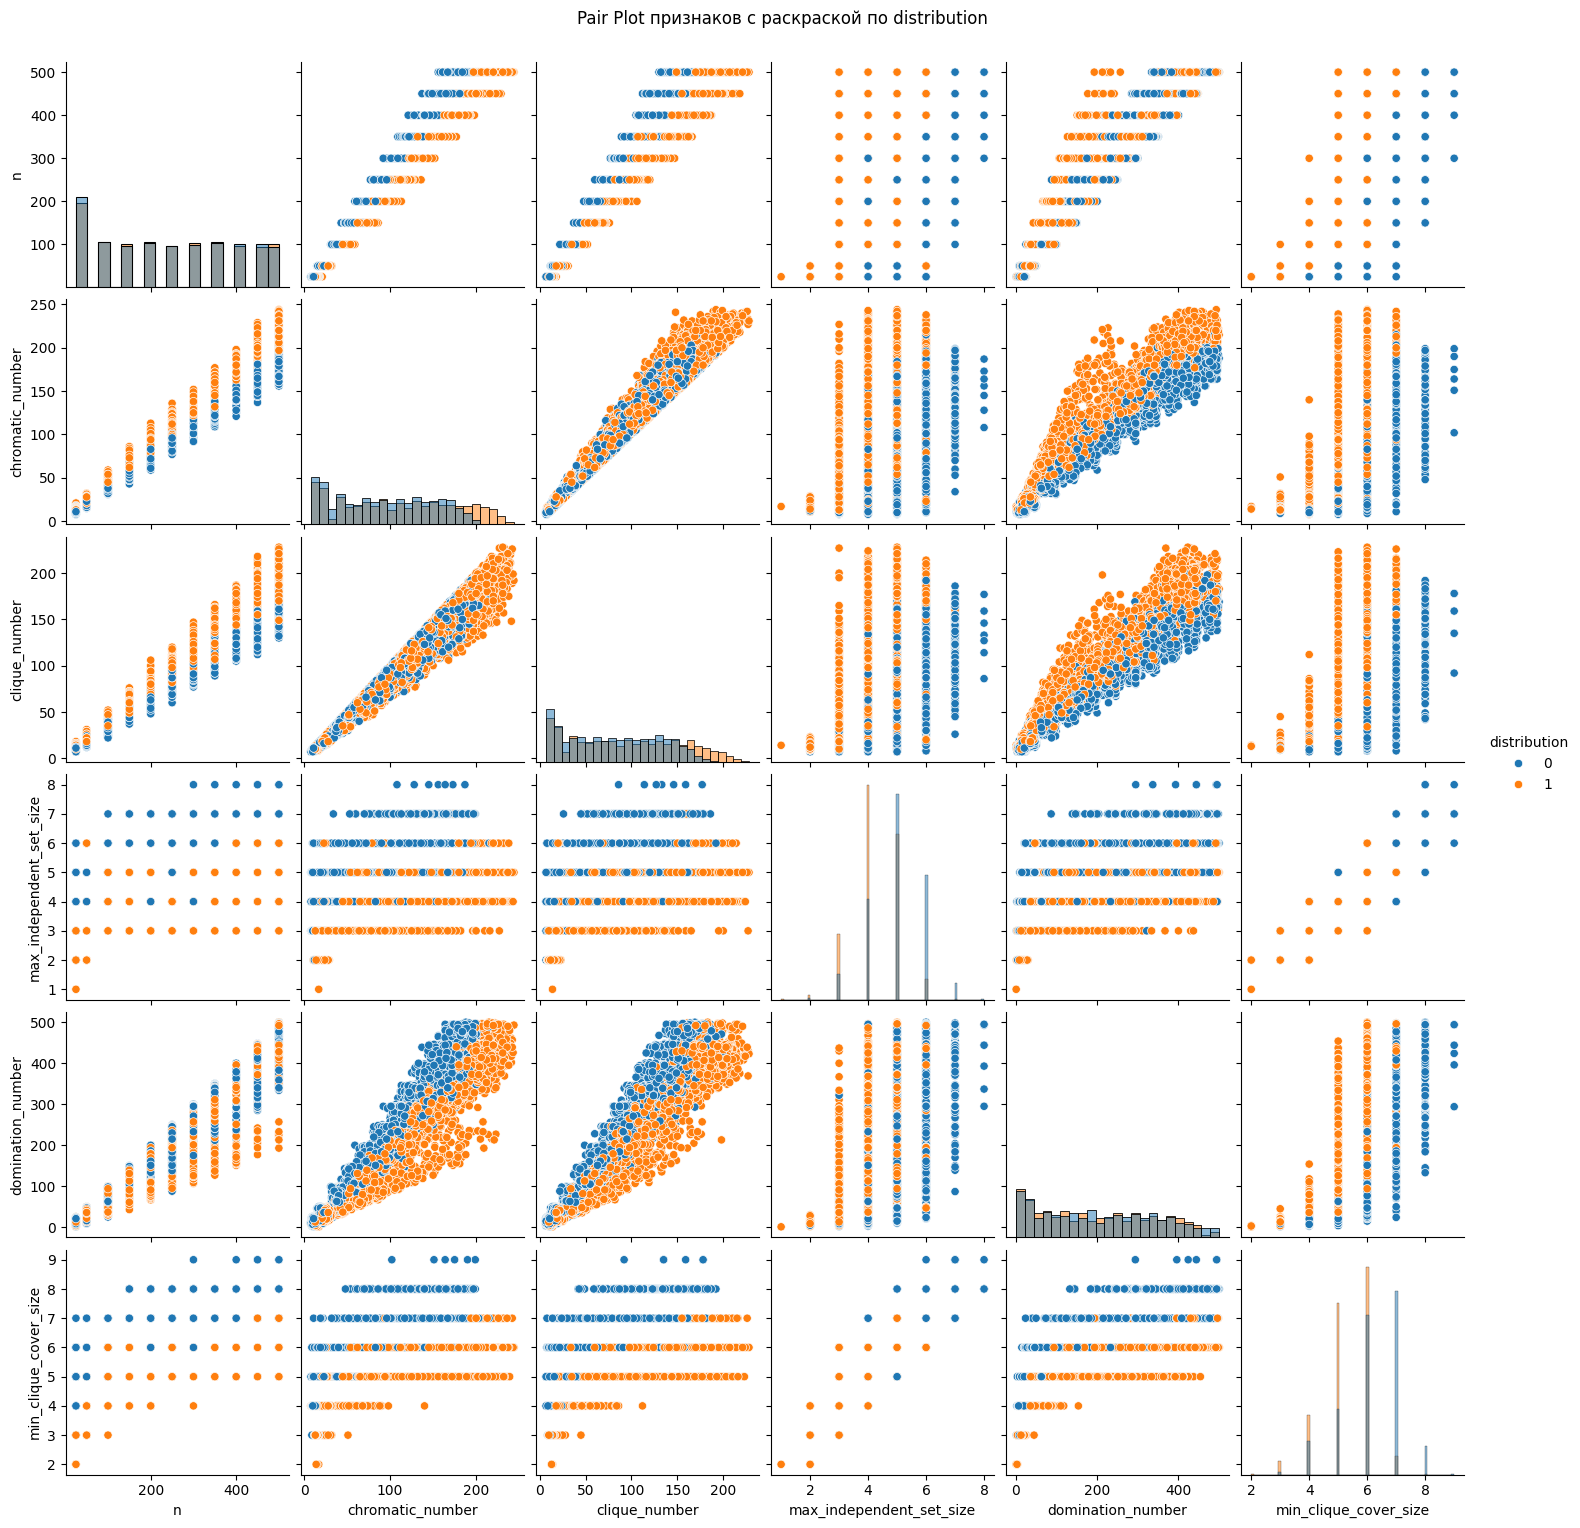

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    hue='distribution',
    vars=[
        'n',
        'chromatic_number',
        'clique_number',
        'max_independent_set_size',
        'domination_number',
        'min_clique_cover_size'
    ],
    diag_kind='hist'
)

plt.suptitle('Pair Plot признаков с раскраской по distribution', y=1.02)
plt.show()

**Выводы**
* самые важные признаки для классификации: `chromatic_number` и `clique_number`, они достаточно хорошо при всех `n` разделяют данную выборку на два класса
* при росте `n` важность характеристик не менятеся, по прежнему самы важные - это `chromatic_number` и `clique_number`, но качество предсказания заметно улучшается

**Между признаками прослеживаются зависимости:**
* `chromatic_number` и `clique_number` линейно зависят друг от друга
* `domination_number` линейно зависит от `chromatic_number` и `clique_number`
* `max_independent_set_size` и `min_clique_cover_size` квадратично зависят от `domination_number`
* `max_independent_set_size` квадратично зависит от `chromatic_number` и `clique_number`
* `min_clique_cover_size` квадратично зависит от `chromatic_number` и `clique_number`

**Посмотрим на матрицу корреляций:**

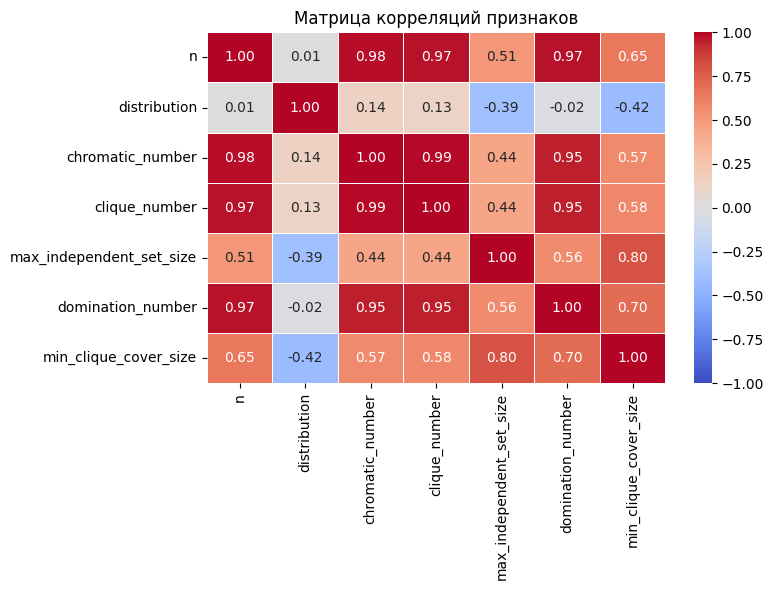

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Матрица корреляций признаков")
plt.tight_layout()
plt.show()

**Выводы**
* Несмотря на вывод про`chromatic_number` и `clique_number` в предыдущем пункте, получилось, что самая сильная корреляция с таргетом у `max_independent_set_size` и `min_clique_cover_size`
* `domination_number` имеет сильную корреляцию со всеми остальными признаками и очень слабую с таргетом, возможно, стоит попробовать его удалить

**Попробуем сгенерировать новые признаки**

In [9]:
import pandas as pd
import numpy as np

df['chromatic_number_norm']               = df['chromatic_number'] / df['n']
df['clique_number_norm']                  = df['clique_number'] / df['n']
df['max_independent_set_size_norm']       = df['max_independent_set_size'] / df['n']
df['domination_number_norm']              = df['domination_number'] / df['n']
df['min_clique_cover_size_norm']          = df['min_clique_cover_size'] / df['n']

df['chromatic_to_clique_ratio']           = df['chromatic_number'] / df['clique_number']
df['chromatic_to_max_independent_ratio']  = df['chromatic_number'] / df['max_independent_set_size']
df['clique_to_max_independent_ratio']     = df['clique_number']    / df['max_independent_set_size']
df['domination_to_clique_ratio']          = df['domination_number'] / df['clique_number']
df['min_clique_cover_to_chromatic_ratio'] = df['min_clique_cover_size'] / df['chromatic_number']

bins   = [0, 100, 300, df['n'].max()]
labels = ['small', 'medium', 'large']
df['n_bin'] = pd.cut(df['n'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['n_bin'], drop_first=True)

print(df.shape)

(10000, 19)


Посмотрим, что получилось

In [10]:
df.sample(10)

,n,distribution,chromatic_number,clique_number,max_independent_set_size,domination_number,min_clique_cover_size,chromatic_number_norm,clique_number_norm,max_independent_set_size_norm,domination_number_norm,min_clique_cover_size_norm,chromatic_to_clique_ratio,chromatic_to_max_independent_ratio,clique_to_max_independent_ratio,domination_to_clique_ratio,min_clique_cover_to_chromatic_ratio,n_bin_medium,n_bin_large
3941,300,1,141,118,6,291,6,0.470000,0.393333,0.020000,0.970000,0.020000,1.194915,23.50,19.666667,2.466102,0.042553,True,False
2183,500,1,216,205,5,418,6,0.432000,0.410000,0.010000,0.836000,0.012000,1.053659,43.20,41.000000,2.039024,0.027778,False,True
9635,200,1,77,69,4,158,5,0.385000,0.345000,0.020000,0.790000,0.025000,1.115942,19.25,17.250000,2.289855,0.064935,True,False
7516,400,0,156,148,6,379,7,0.390000,0.370000,0.015000,0.947500,0.017500,1.054054,26.00,24.666667,2.560811,0.044872,False,True
9360,25,0,12,9,5,22,5,0.480000,0.360000,0.200000,0.880000,0.200000,1.333333,2.40,1.800000,2.444444,0.416667,False,False
2725,250,0,101,82,5,190,6,0.404000,0.328000,0.020000,0.760000,0.024000,1.231707,20.20,16.400000,2.317073,0.059406,True,False
3323,300,1,130,112,5,256,6,0.433333,0.373333,0.016667,0.853333,0.020000,1.160714,26.00,22.400000,2.285714,0.046154,True,False
8510,300,0,112,103,4,221,6,0.373333,0.343333,0.013333,0.736667,0.020000,1.087379,28.00,25.750000,2.145631,0.053571,True,False
7233,50,0,25,25,4,24,5,0.500000,0.500000,0.080000,0.480000,0.100000,1.000000,6.25,6.250000,0.960000,0.200000,False,False
928,150,1,73,61,5,120,5,0.486667,0.406667,0.033333,0.800000,0.033333,1.196721,14.60,12.200000,1.967213,0.068493,True,False


Построим матрицу корреляций с новыми признаками

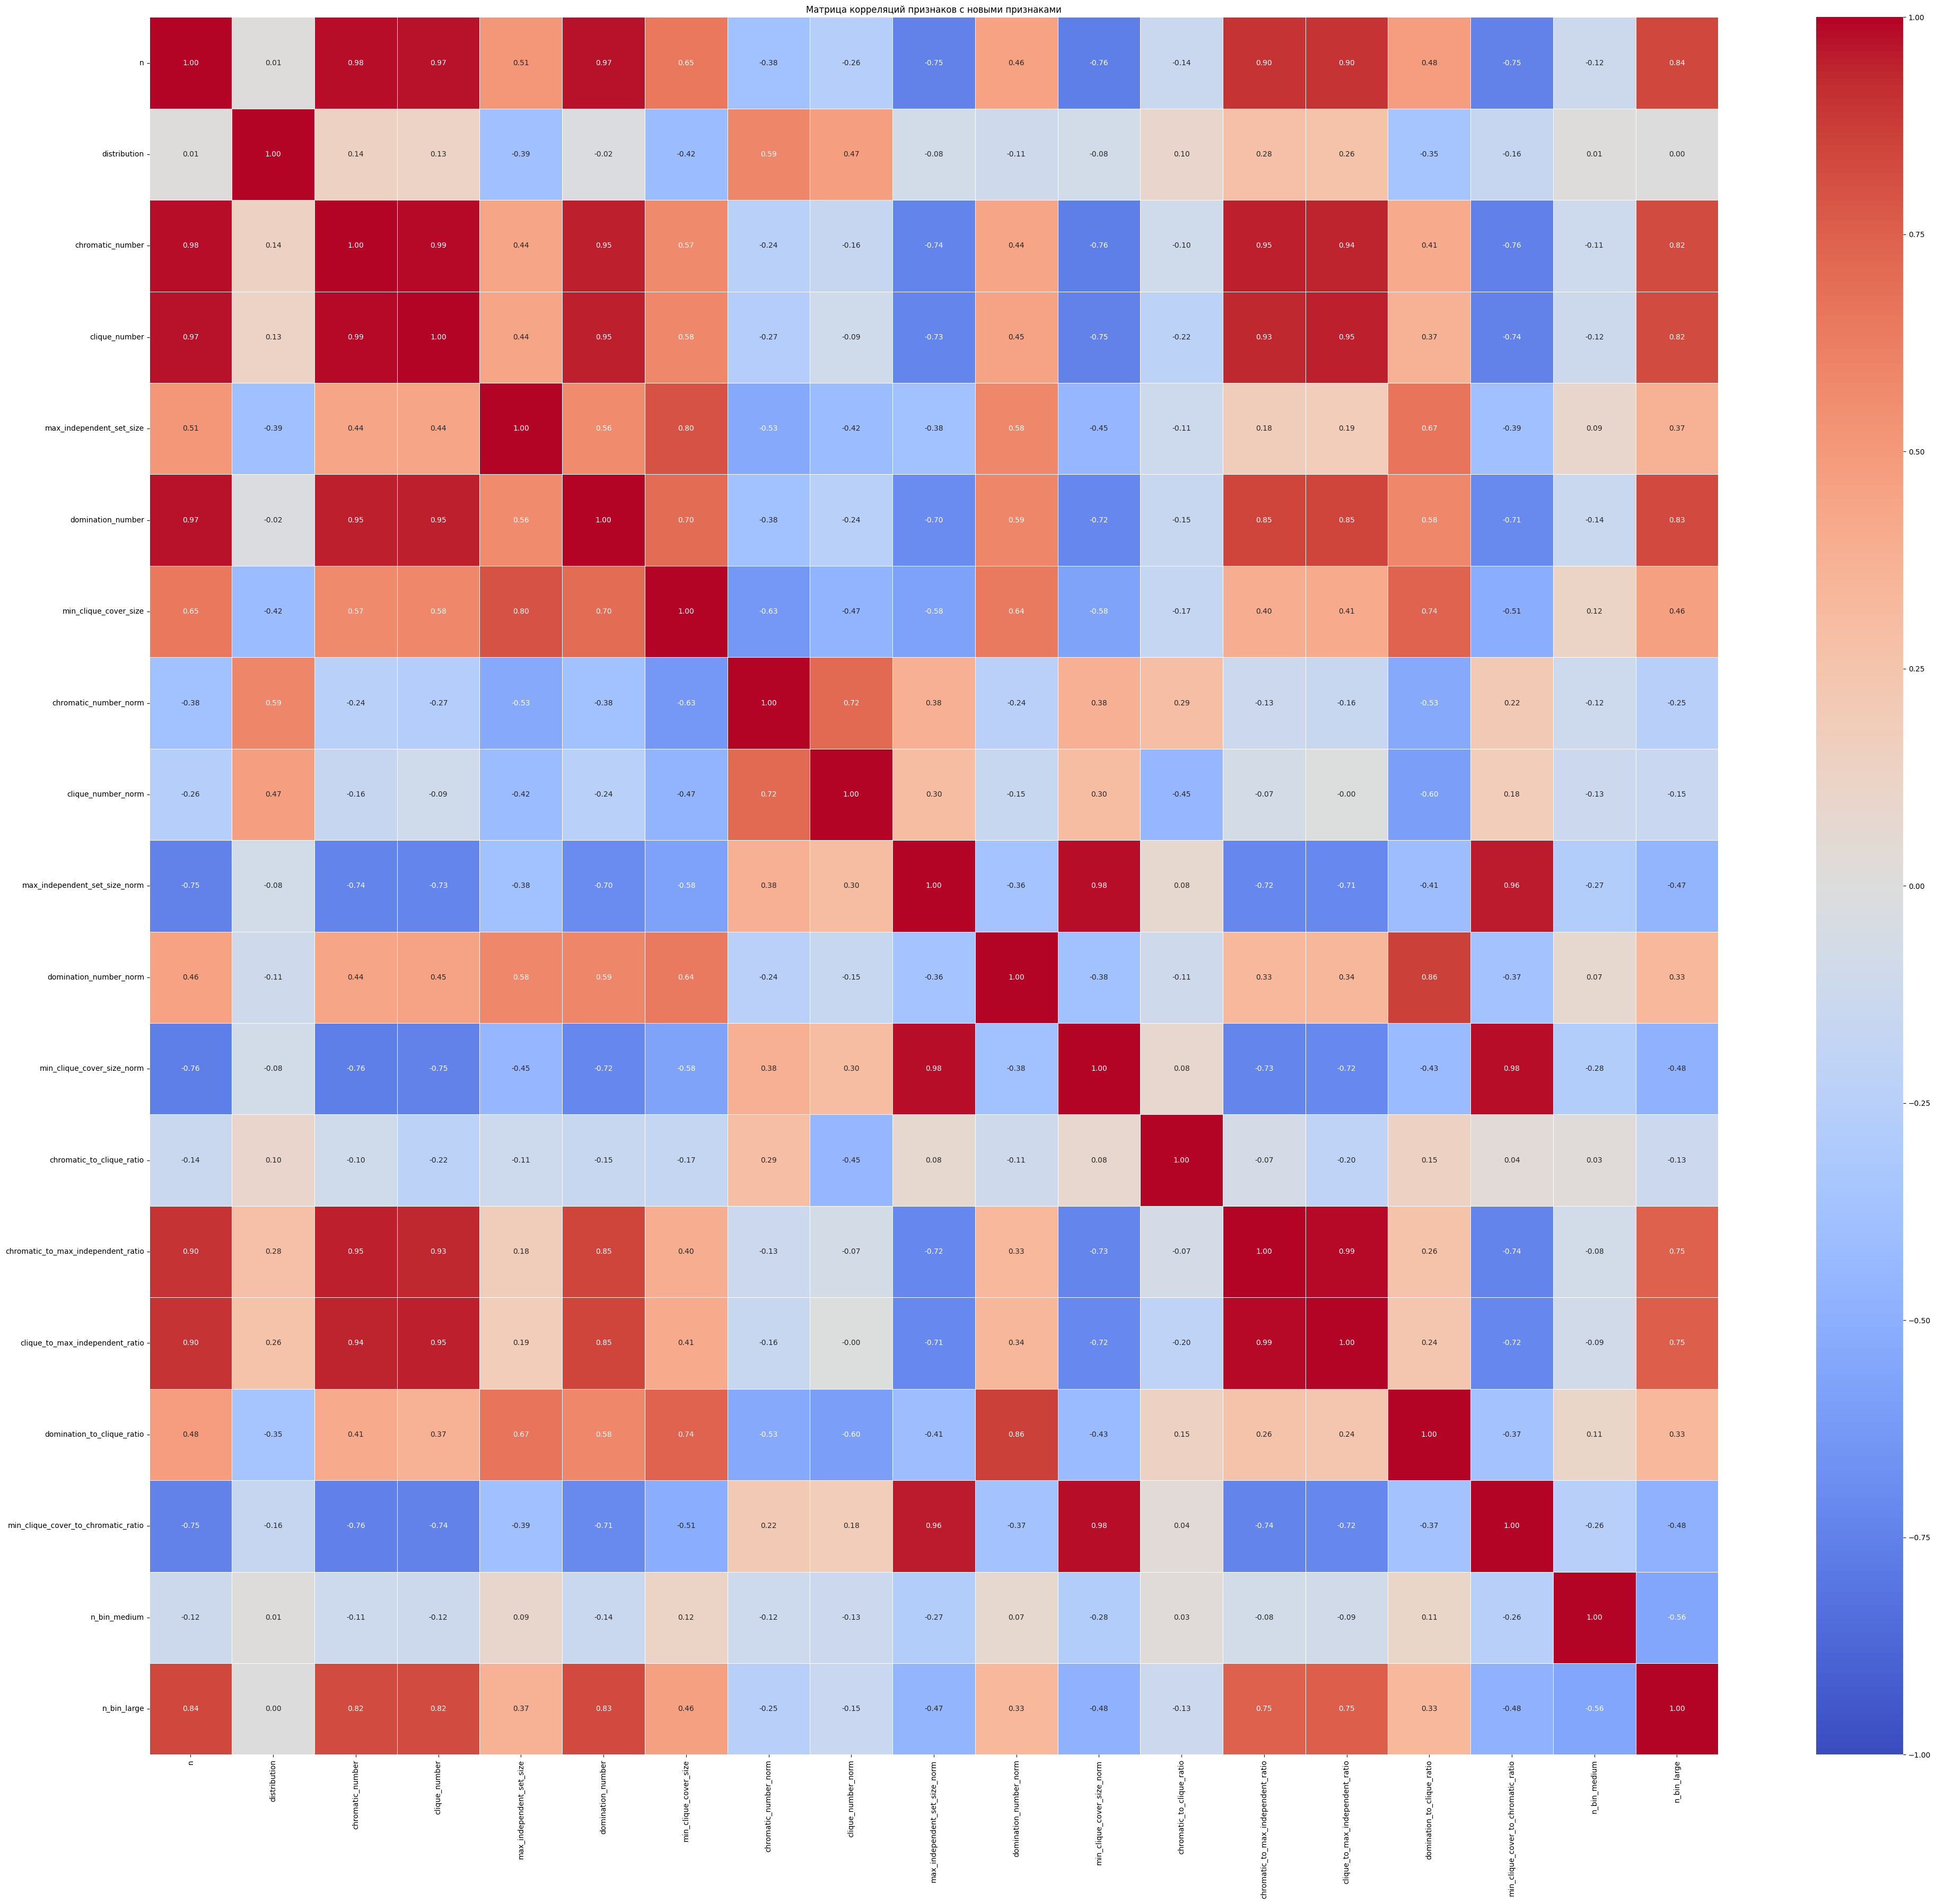

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(40, 36))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title("Матрица корреляций признаков с новыми признаками")
plt.tight_layout()
plt.show()

**Вывод:** на мой взгляд мы получили достаточно неплохие результаты, так как у нас появилось несколько признаков, которые очень хорошо коррелируют с таргетом, например `chromatic_number_norm` и `clique_number_norm`, хотя изначальные сырьевые признаки коррелировали с таргетом намного меньше.

Загрузим датасет с новыми признаками в файл:

In [12]:
df.to_csv('data/distance_graph_dataset_new_features_2.csv', index=False)

## Общий вывод

* самые важные признаки для классификации: `max_independent_set_size` и `min_clique_cover_size`
* при росте `n` важность характеристик не изменяется, но граница между классами становится более отчетлива
* нормировка `chromatic_number` и `clique_number` по `n` дает корреляцию с таргетом более 40%

## План на построения классификационных алгоритмов

**Метрики:** accuracy, precision, recall, F1-score, ROC AUC.

**Scaler:** StandartScaler

**Модели:**
1. **Baseline:** Логистическая регрессия (sklearn.linear_model.LogisticRegression), отобрать нужные признаки из новых с помощью L1 и L2
2. SVM (sklearn.svm.SVC): (kernel='linear')
3. SVM (sklearn.svm.SVC): (kernel='rbf') 
4. Random Forest (sklearn.ensemble.RandomForestClassifier)